# ***Diabetes Prediction using Machine Learning***



### ***Machine Learning Workflow***##

*   Reading in and inspecting data
*   Dealing with zero values
*   Exploratory data analysis
*   Model building 
*   Model evaluation 
*   Model selection
*   Improvements
*   Deployment 




###**Problem Statement**


**Variabel prediktor medis (independent)**

*   Pregnancies : Number of times pregnant
*   Glucose :  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   BloodPressure: Diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skin fold thickness (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Body mass index (weight in kg/(height in m)^2)
*   DiabetesPedigreeFunction: Diabetes pedigree function
*   Age: Age (years)

**Variabel target (dependen )**


*   Outcome: Class variable (0 or 1)


***Import Libraries***

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#imports all libraries

from google.colab import drive


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# Libraries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from imblearn.over_sampling import SMOTE

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (RandomForestClassifier, )
from sklearn.metrics import (accuracy_score, 
                             recall_score,
                             f1_score,
                             ConfusionMatrixDisplay, 
                             classification_report,
                             confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
sns.set_theme(style="darkgrid")


###baru

%matplotlib inline
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (RandomForestClassifier, )
from sklearn.metrics import (accuracy_score, 
                             recall_score,
                             f1_score,
                             ConfusionMatrixDisplay, 
                             classification_report,
                             confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score




# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


import plotly.express as px
import plotly.graph_objects as go

import plotly.offline as py

# Library to split data 
from sklearn.model_selection import train_test_split


# Libtune to tune model, get different metric scores
from sklearn import metrics

##**Reading in and inspecting data**
 **Data Collection**

In [ ]:
#load dataset
#dataset = pd.read_csv('diabetes.csv')
from google.colab import drive
drive.mount("/content/gdrive")
df= pd.read_csv('/content/gdrive/My Drive/diabetes.csv')

df.sample(8)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
656,2,101,58,35,90,21.8,0.155,22,0
738,2,99,60,17,160,36.6,0.453,21,0
155,7,152,88,44,0,50.0,0.337,36,1
137,0,93,60,25,92,28.7,0.532,22,0
82,7,83,78,26,71,29.3,0.767,36,0
581,6,109,60,27,0,25.0,0.206,27,0
420,1,119,88,41,170,45.3,0.507,26,0
542,10,90,85,32,0,34.9,0.825,56,1


**Read and Understand Data**

**Dataset info**

In [ ]:
# information about the structure and summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Dataset Shape**

In [ ]:
#retrieve the dimensions of dataset
# copying data to another varaible to avoid any changes to original data
df_copy=df.copy()
print(f'There are {df_copy.shape[0]} rows and {df_copy.shape[1]} columns') # fstring 

There are 768 rows and 9 columns


**Data types**

In [ ]:
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  #  count of unique values

######################################## 
 Features : 

 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
######################################## 
Missing values :

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
######################################## 
Unique values :  

 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


**Unique Values**

In [ ]:
# iterate over the columns of dataset and print each column name along with its unique values.
for col in df.columns:
    print('-------------------------------------------------------------------------')
    print(col)
    print('-------------------------------------------------------------------------')
    print(df[col].unique())


-------------------------------------------------------------------------
Pregnancies
-------------------------------------------------------------------------
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
-------------------------------------------------------------------------
Glucose
-------------------------------------------------------------------------
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
-------------------------------------------------------------------------
Bloo

In [ ]:
# check if there are any null or missing values in the dataset.
df.isnull().values.any()

False

In [ ]:
# count the number of null or missing values in each column of dataset.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#check for null or missing values in the first 10 rows of a dataset.
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


***Replace 0 by NaN***

In [ ]:
# Replace Value 0 ke NaN value
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

**Data Cleaning**

In [ ]:
# count the number of null or missing values in each column of dataset after 0 replaced by NanN
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Dataset Backup**

In [ ]:
#creates a shallow copy of a dataset and assigns it to a new named dataset_copy.
df_copy = df.copy()
df_copy.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
480,3,158.0,70.0,30.0,328.0,35.5,0.344,35,1
239,0,104.0,76.0,NaN,NaN,18.4,0.582,27,0
109,0,95.0,85.0,25.0,36.0,37.4,0.247,24,1
697,0,99.0,NaN,NaN,NaN,25.0,0.253,22,0
387,8,105.0,100.0,36.0,NaN,43.3,0.239,45,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1


**Dataset Descriptive Statistics**

In [ ]:
 #transpose the descriptive statistics 
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##**Exploratory Data Analysis**

***Univariate Analysis***

In [ ]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

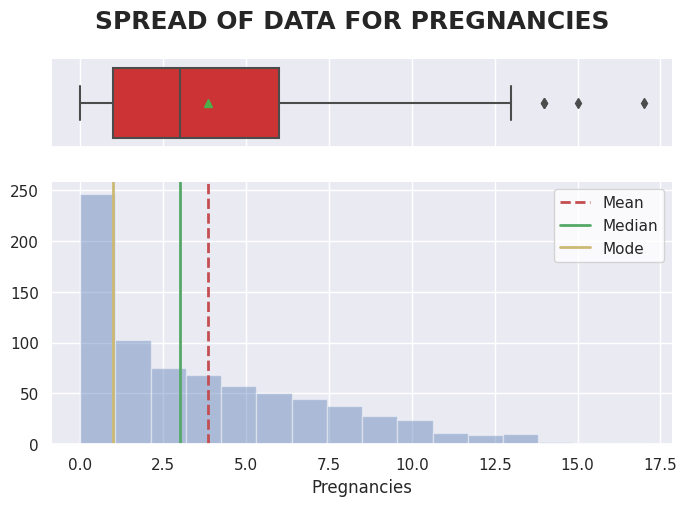

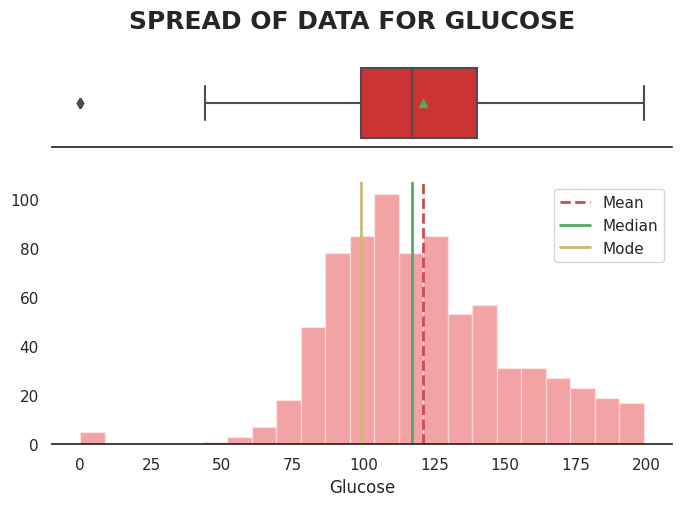

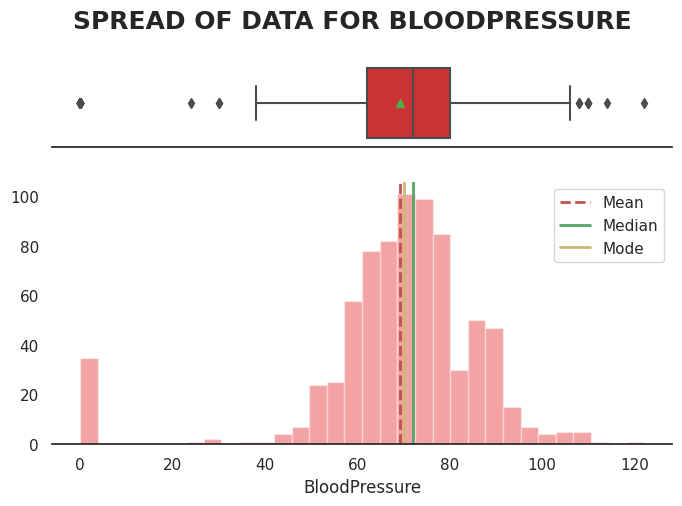

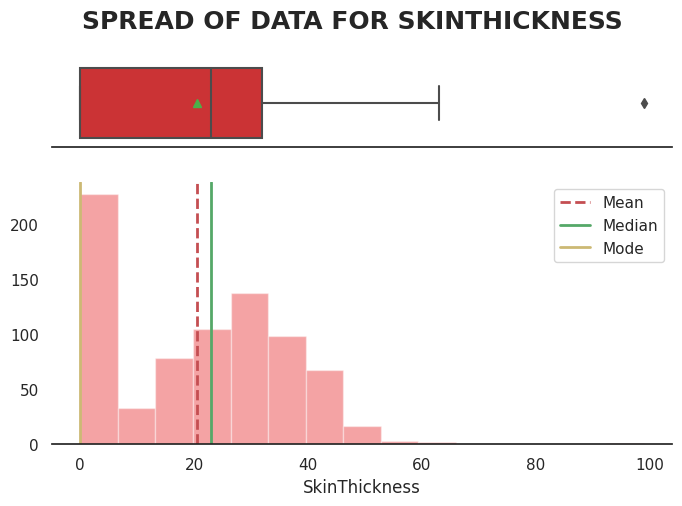

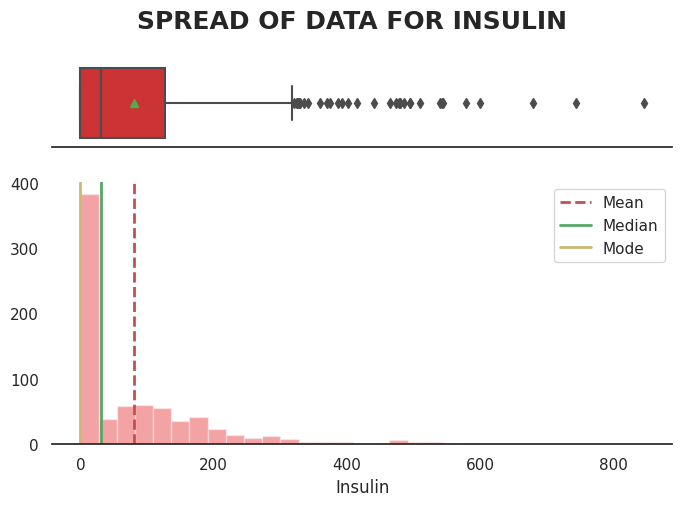

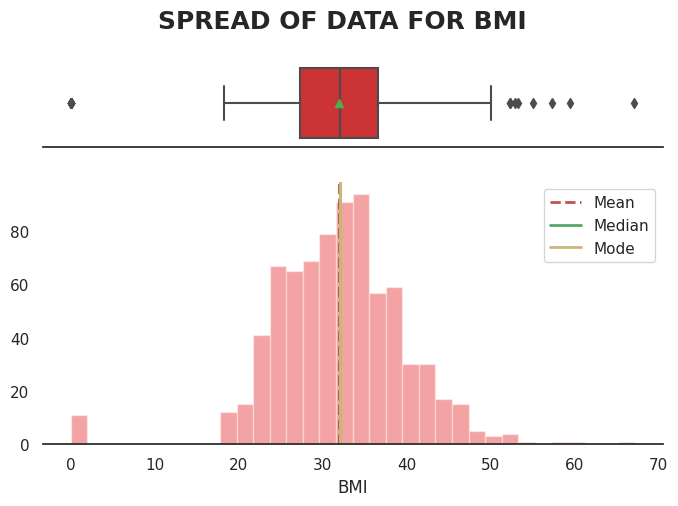

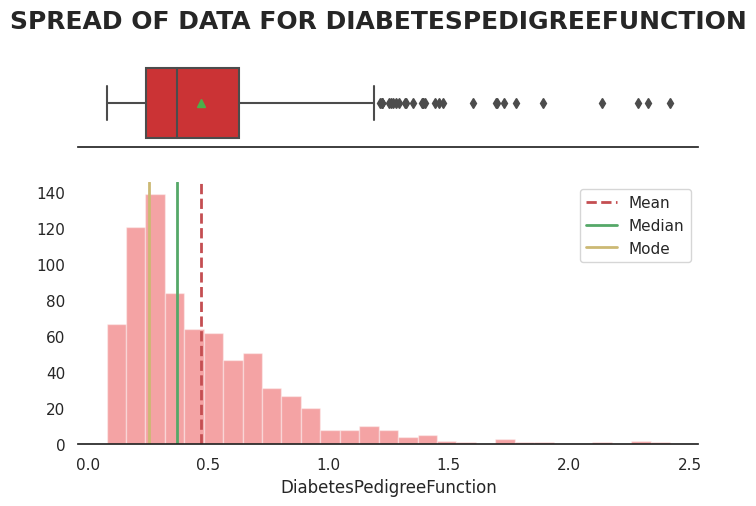

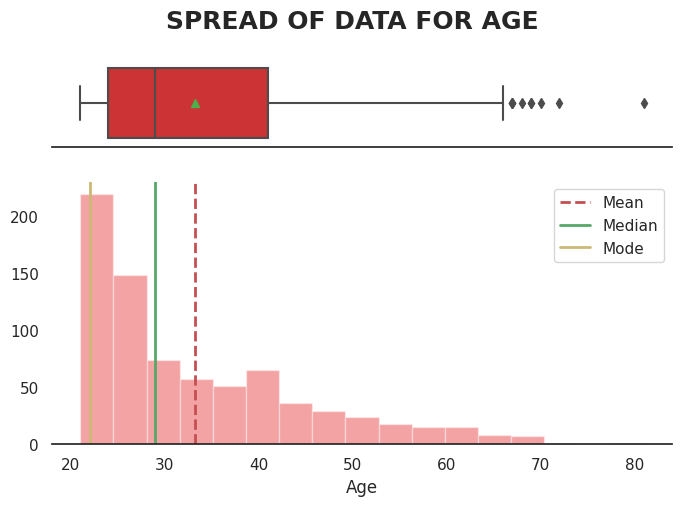

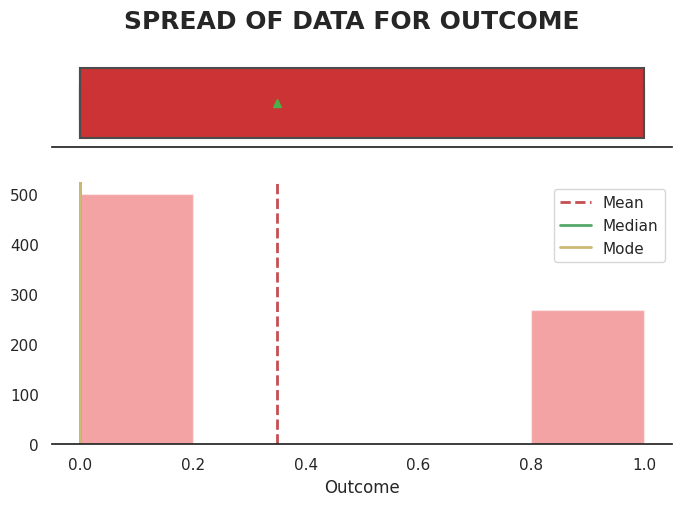

In [ ]:
#select all quantitative columns for checking the spread
list_col= data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

**Hasil Pengamatan**

**Observations on Class**

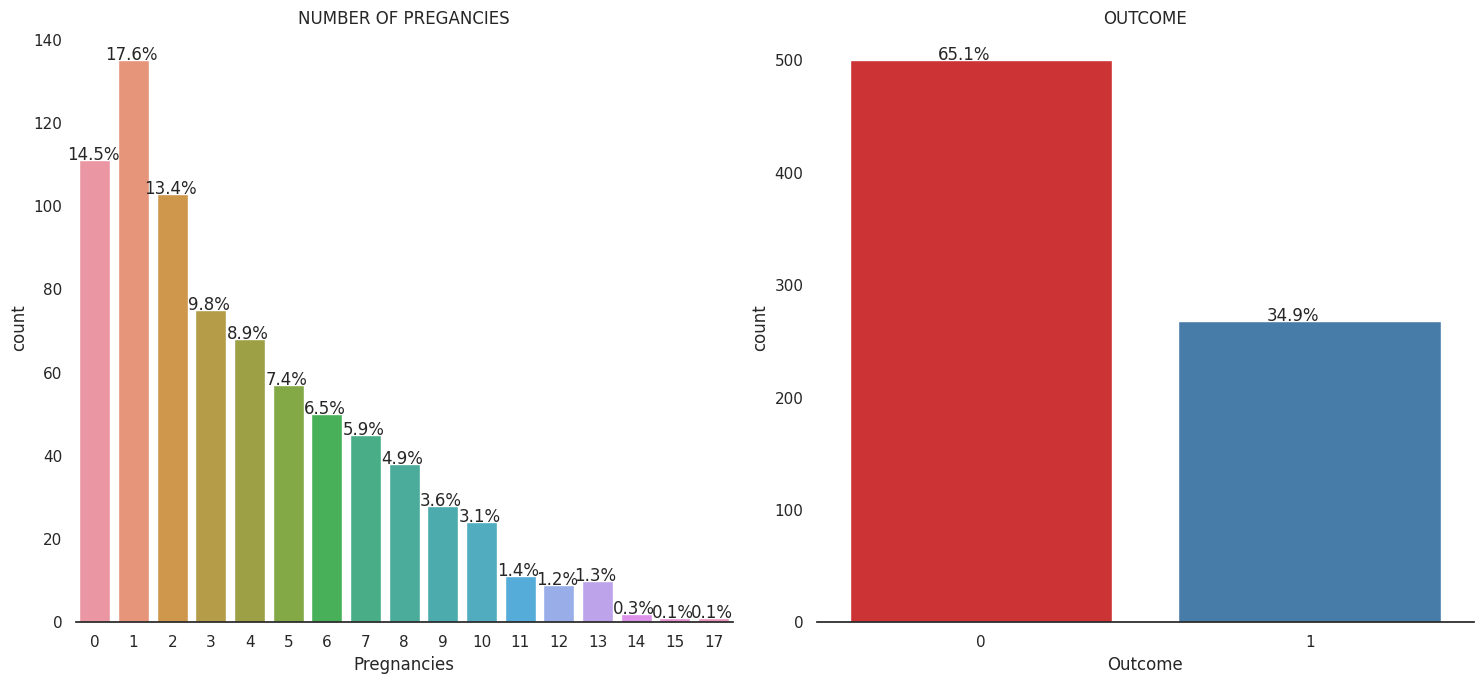

In [ ]:
# Making a list of all categorical variables
cat_columns = ['Pregnancies','Outcome']
title=['Number of Pregancies','Outcome']
plt.figure(figsize=(15,7))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
for i, variable in enumerate(cat_columns):
                     plt.subplot(1,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set1')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

**Bivariate Analysis**

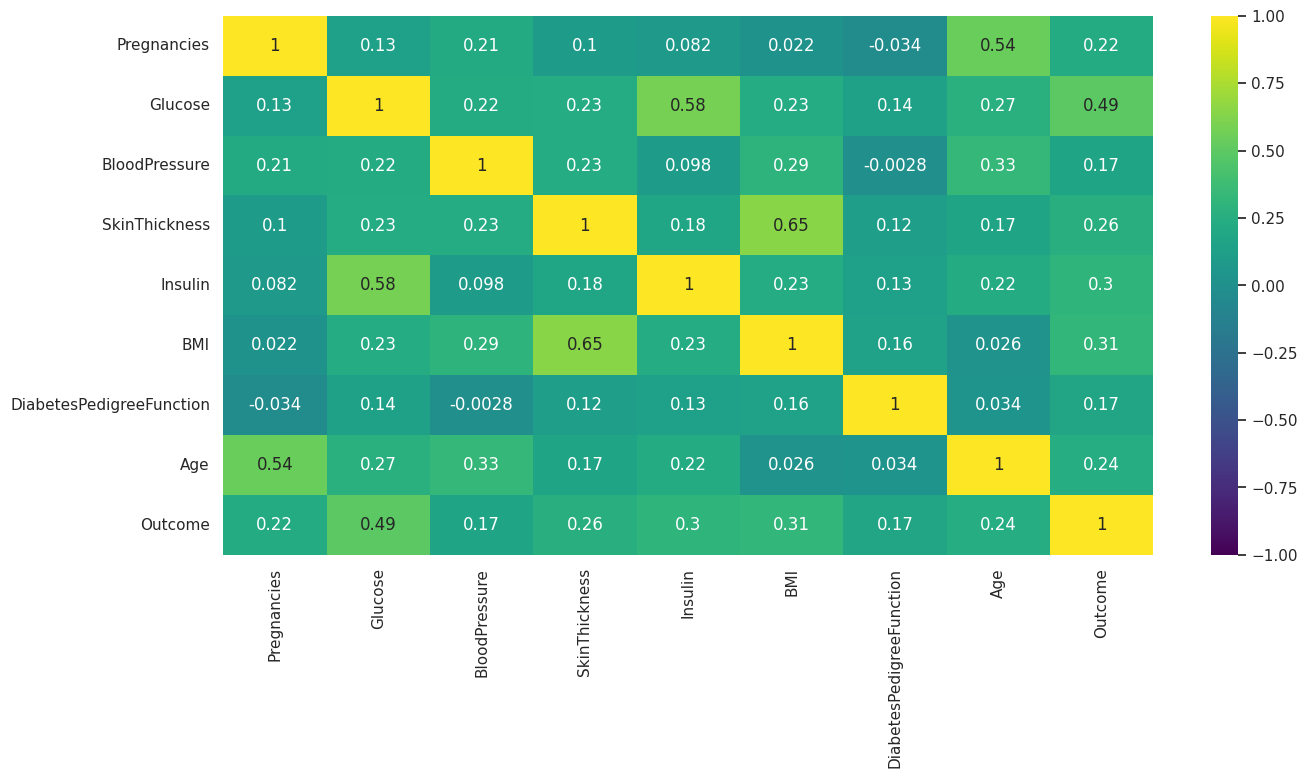

In [ ]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

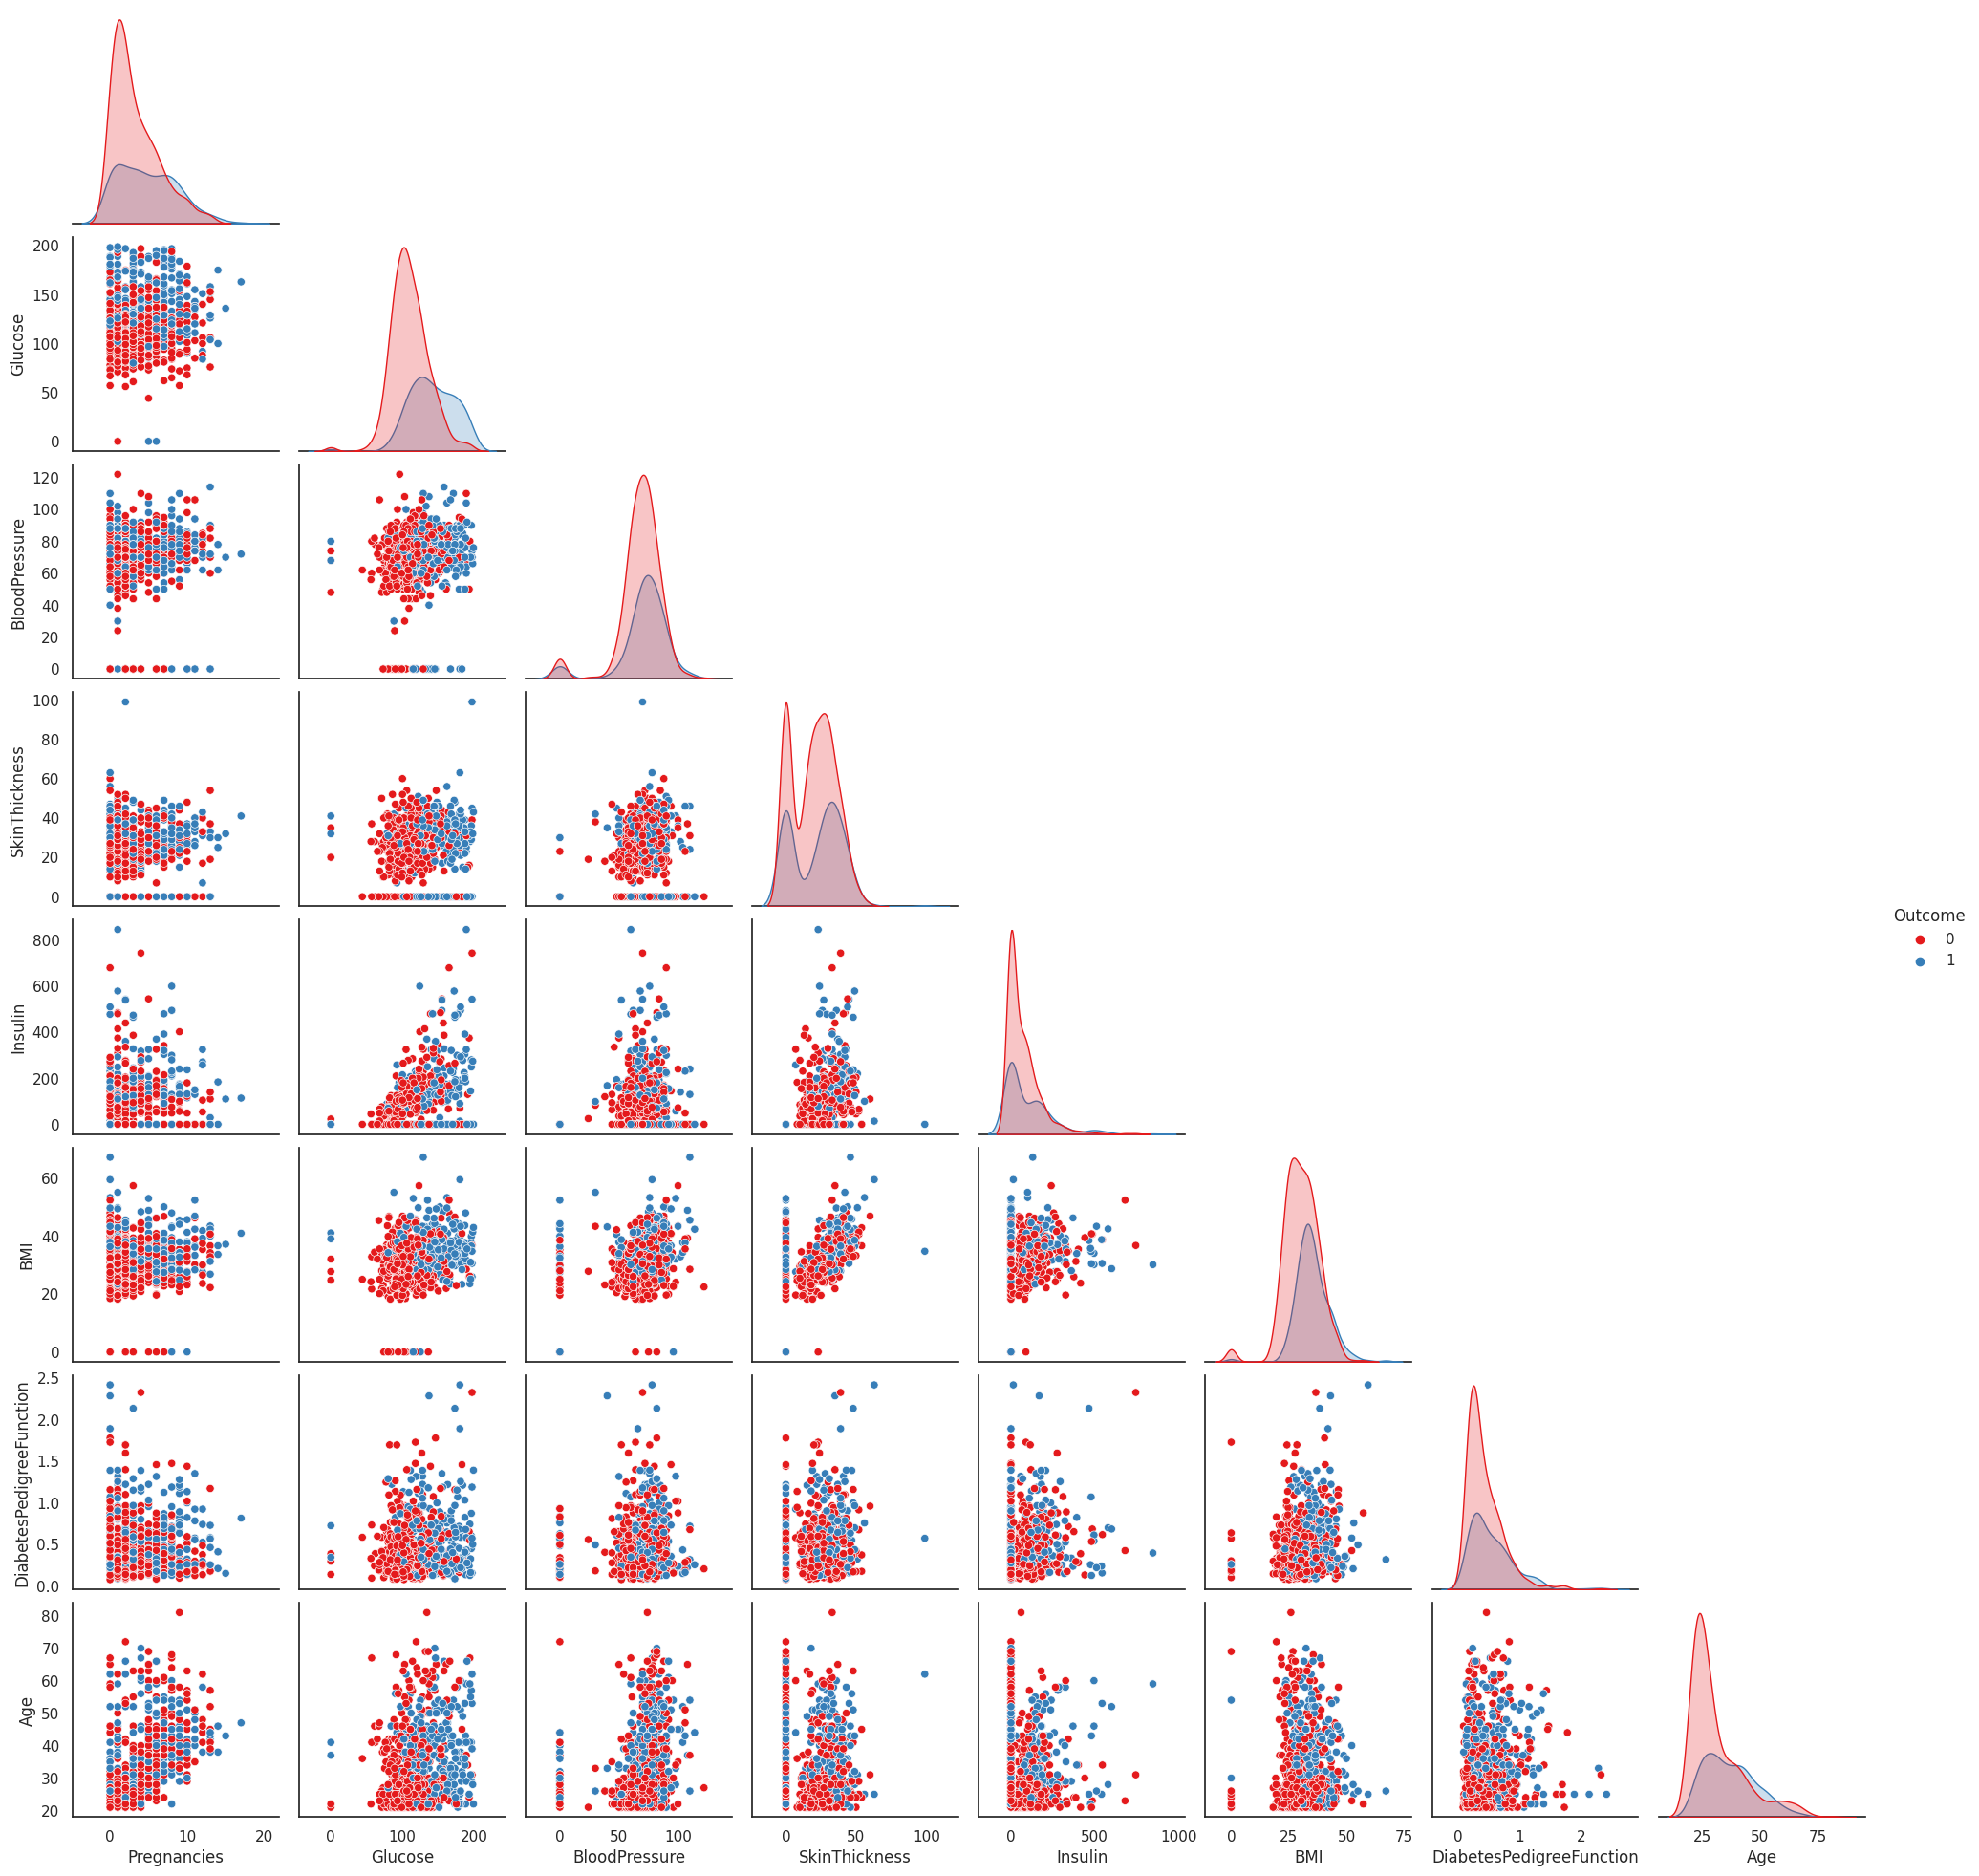

In [ ]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=data,hue="Outcome",corner=True)
plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

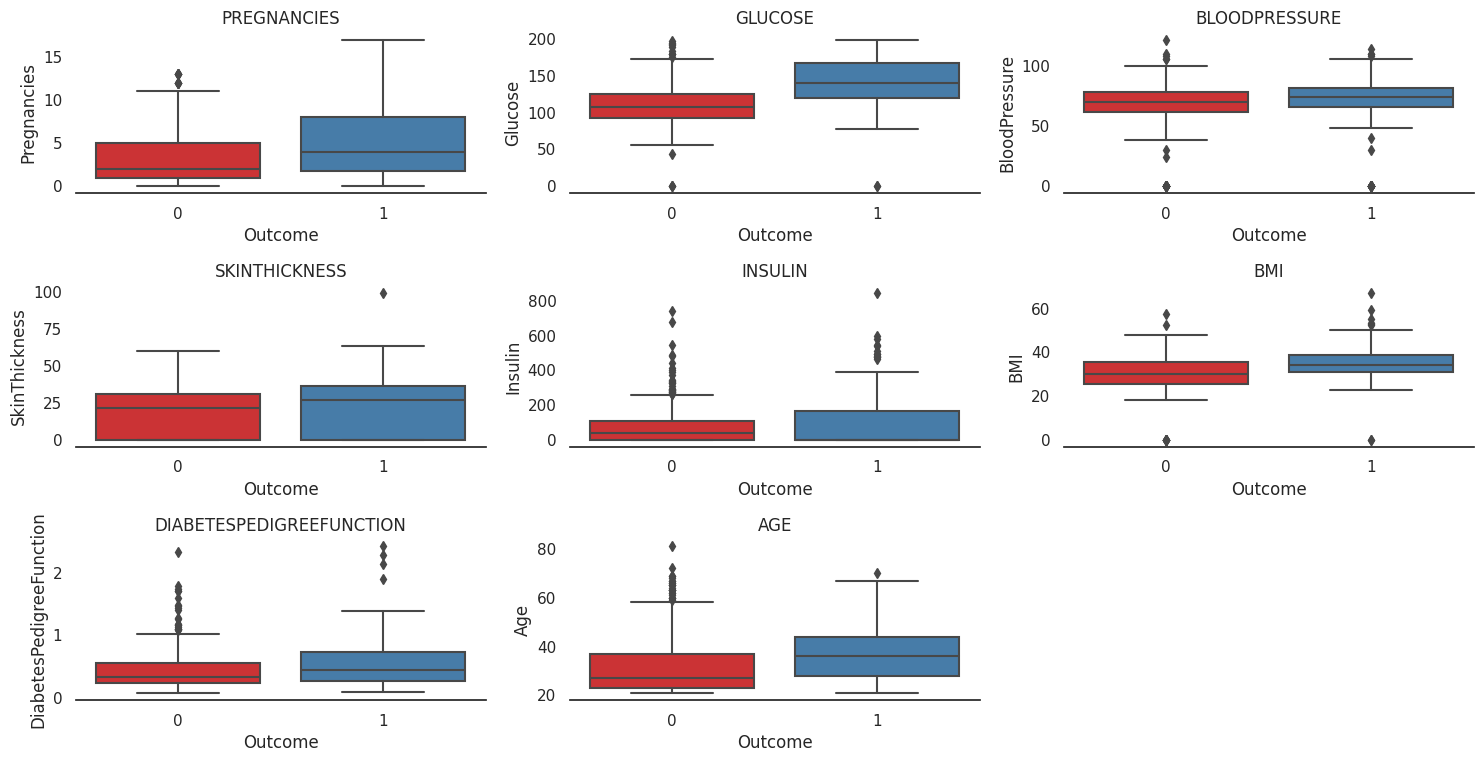

In [ ]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set1", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Outcome',y= data[variable], data=data)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

###***Data Preprocessing***
**Handling Missing value**

In [ ]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

def mean_target(var):
    temp1 = df[df[var].notnull()]
    temp1 = temp1[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp1

In [ ]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
mean_target('Glucose')

,Outcome,Glucose
0,0,110.643863
1,1,142.319549


In [ ]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [ ]:
mean_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.877339
1,1,75.321429


In [ ]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [ ]:
mean_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.235457
1,1,33.000000


In [ ]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [ ]:
mean_target('Insulin')

,Outcome,Insulin
0,0,130.287879
1,1,206.846154


In [ ]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [ ]:
mean_target('BMI')

,Outcome,BMI
0,0,30.859674
1,1,35.406767


In [ ]:
# Replace Null value with Glucose Mean 
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 109.98
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 141.25
# Replace Null value with BloodPressure Mean  
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 68.18
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.82
# Replace Null value with  Skinthickness Median
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 21
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
# Replace Null value with  Insulin Median  
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 39
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 0.0
# Replace Null value with  BMI Median  
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.05
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.25

**Split Data**

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

##***Model building***

####***1. Training Testing 80:20***

####***1.1 Training Testing : SMOTE, Standard Sclaer, KFold***

Training Accuracy Score: 0.762
Testing Accuracy Score: 0.688
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74        99
           1       0.55      0.69      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.69       154



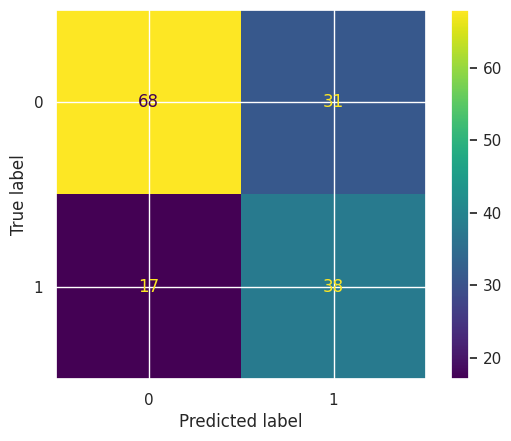

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan StandardScaler pada data latih dan uji
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Melatih model logistik pada data yang telah di-resampling dan di-scaling
model = LogisticRegression()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
model.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = model.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


####***1.2 Training Testing: XBG Classifier***

Training Accuracy Score: 0.911
Testing Accuracy Score: 0.844
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        99
           1       0.75      0.84      0.79        55

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.85      0.84      0.85       154



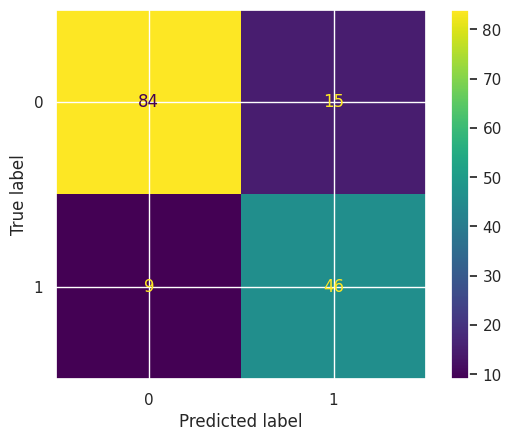

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelXGB = XGBClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelXGB, X_resampled_scaled, y_resampled, cv=kf)

modelXGB.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelXGB.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***1.3 Training Testing: SVC***

Training Accuracy Score: 0.814
Testing Accuracy Score: 0.766
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        99
           1       0.63      0.82      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.77       154



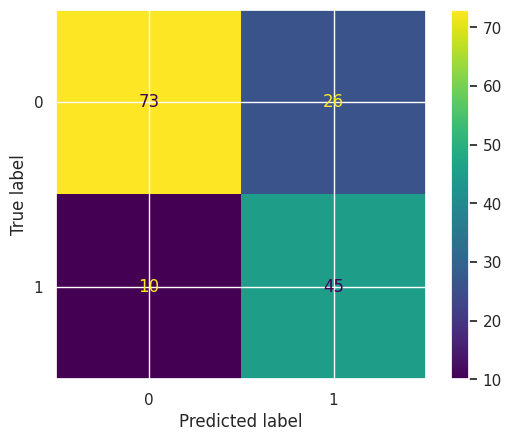

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelSVC = SVC()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelSVC, X_resampled_scaled, y_resampled, cv=kf)

modelSVC.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelSVC.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***1.4 Training Testing: KNeighbors Classifier***

Training Accuracy Score: 0.803
Testing Accuracy Score: 0.721
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.75        99
           1       0.58      0.82      0.68        55

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.72      0.73       154



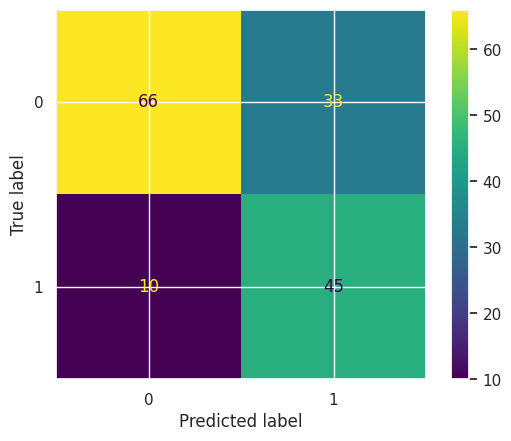

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelKNC = KNeighborsClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelKNC, X_resampled_scaled, y_resampled, cv=kf)

modelKNC.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelKNC.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***1.5 Training Testing: Decision Tree Classifier***

Training Accuracy Score: 0.875
Testing Accuracy Score: 0.831
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        99
           1       0.74      0.82      0.78        55

    accuracy                           0.83       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.84      0.83      0.83       154



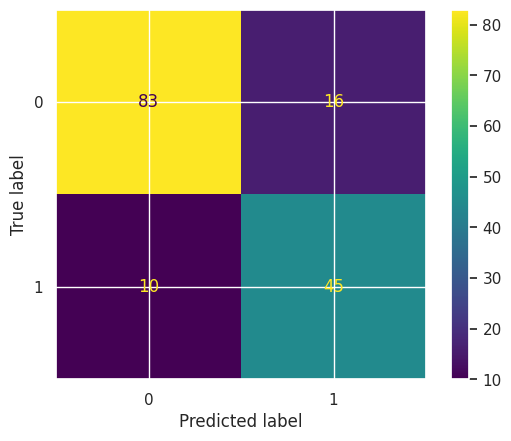

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelDT = DecisionTreeClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelDT, X_resampled_scaled, y_resampled, cv=kf)

modelDT.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelDT.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***1.6 Training Testing : Logistic Regression***

Training Accuracy Score: 0.909
Testing Accuracy Score: 0.883
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        99
           1       0.82      0.85      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.88      0.88      0.88       154



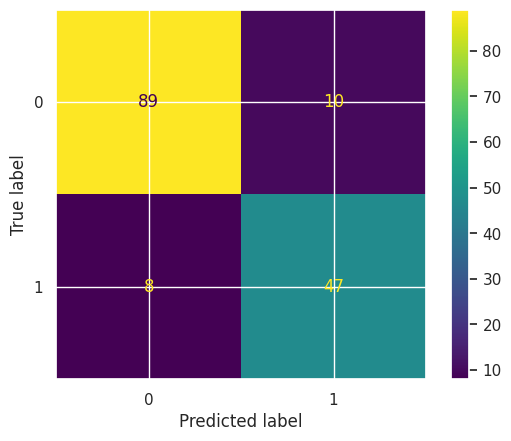

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
estimators =[('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking = StackingClassifier(estimators=estimators,
final_estimator=LogisticRegression())

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking, X_resampled_scaled, y_resampled, cv=kf)

stacking.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = stacking.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***2. Training Testing 70:30***

####***2.1 Training Testing: SMOTE, Standart Scaler, K-Fold cross validation***

Training Accuracy Score: 0.765
Testing Accuracy Score: 0.719
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       151
           1       0.57      0.74      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.74      0.72      0.72       231



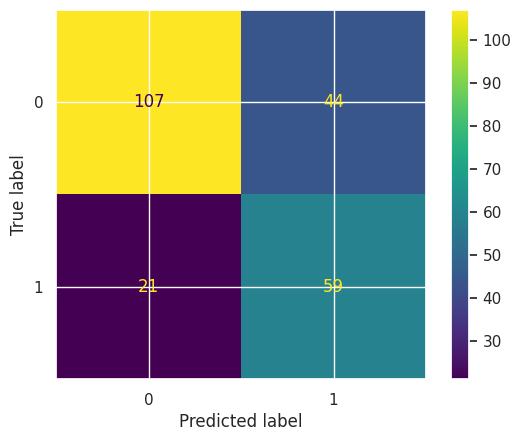

In [ ]:
# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan StandardScaler pada data latih dan uji
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Melatih model logistik pada data yang telah di-resampling dan di-scaling
model = LogisticRegression()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
model.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = model.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***2.2 Training Testing: XGB Classifier***

Training Accuracy Score: 0.920
Testing Accuracy Score: 0.874
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       151
           1       0.81      0.82      0.82        80

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



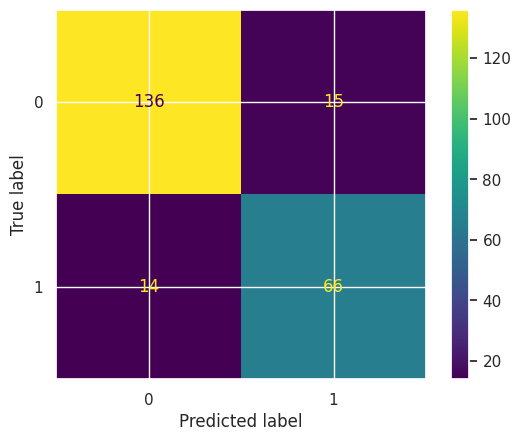

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelXGB_73 = XGBClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelXGB_73, X_resampled_scaled, y_resampled, cv=kf)

modelXGB_73.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelXGB_73.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***2.3 Training Testing: SVC***

Training Accuracy Score: 0.824
Testing Accuracy Score: 0.771
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       151
           1       0.64      0.78      0.70        80

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.79      0.77      0.77       231



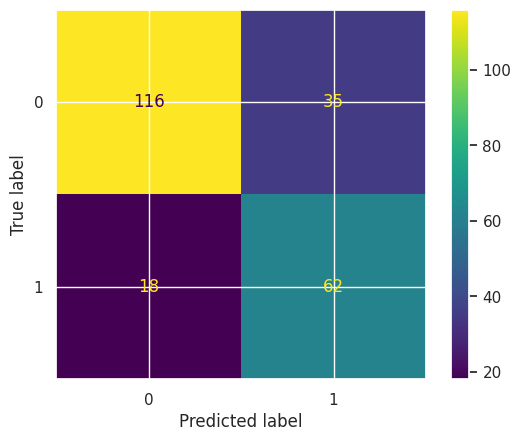

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelSVC_73 = SVC()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelSVC_73, X_resampled_scaled, y_resampled, cv=kf)

modelSVC_73.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelSVC_73.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***2.4 Training Testing: KNeighbors Classifier***

Training Accuracy Score: 0.812
Testing Accuracy Score: 0.749
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       151
           1       0.61      0.76      0.68        80

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.75       231



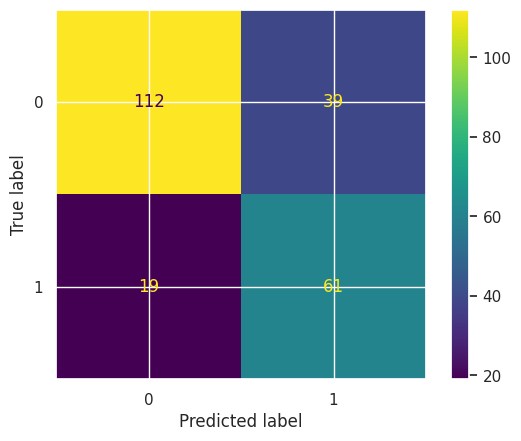

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelKNC_73 = KNeighborsClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelKNC_73, X_resampled_scaled, y_resampled, cv=kf)

modelKNC_73.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelKNC_73.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


####***2.5 Training Testing: Decision Tree Classifier***

Training Accuracy Score: 0.905
Testing Accuracy Score: 0.827
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       151
           1       0.73      0.79      0.76        80

    accuracy                           0.83       231
   macro avg       0.81      0.82      0.81       231
weighted avg       0.83      0.83      0.83       231



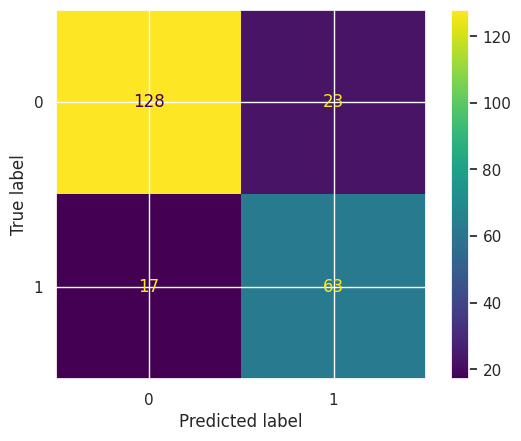

In [ ]:
# Melatih model logistik pada data yang telah di-resampling
modelDT_73 = DecisionTreeClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelDT_73, X_resampled_scaled, y_resampled, cv=kf)

modelDT_73.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelDT_73.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***2.6 Training Testing: Logistic Regression***

Training Accuracy Score: 0.917
Testing Accuracy Score: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.80      0.82      0.81        80

    accuracy                           0.87       231
   macro avg       0.85      0.86      0.85       231
weighted avg       0.87      0.87      0.87       231



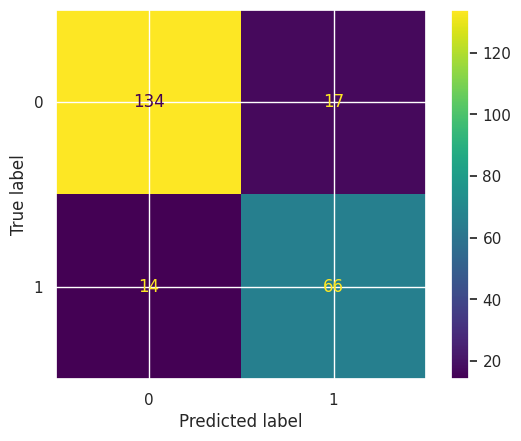

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
estimators =[('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking_73 = StackingClassifier(estimators=estimators,
final_estimator=LogisticRegression())

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_73, X_resampled_scaled, y_resampled, cv=kf)

stacking_73.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = stacking_73.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***3. Training Testing 60:40***

####***3.1 Training Testing: SMOTE, StandardScaler,LogisticRegression, K-Fold Cross Validation***

Training Accuracy Score: 0.742
Testing Accuracy Score: 0.750
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       206
           1       0.60      0.75      0.66       102

    accuracy                           0.75       308
   macro avg       0.73      0.75      0.73       308
weighted avg       0.77      0.75      0.76       308



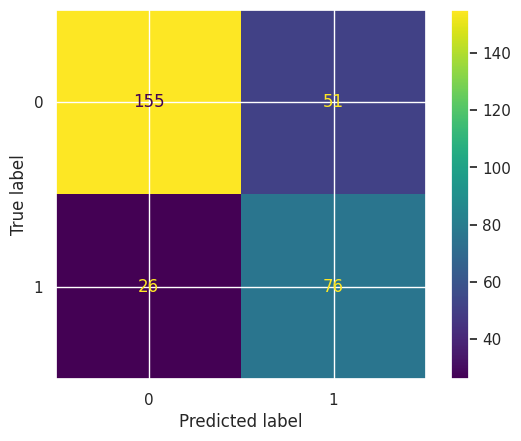

In [ ]:
# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan StandardScaler pada data latih dan uji
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Melatih model logistik pada data yang telah di-resampling dan di-scaling
model_64 = LogisticRegression()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_64, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
model_64.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = model_64.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***3.2 Training Testing: XGBClassifier***

Training Accuracy Score: 0.912
Testing Accuracy Score: 0.883
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       206
           1       0.81      0.84      0.83       102

    accuracy                           0.88       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.88      0.88      0.88       308



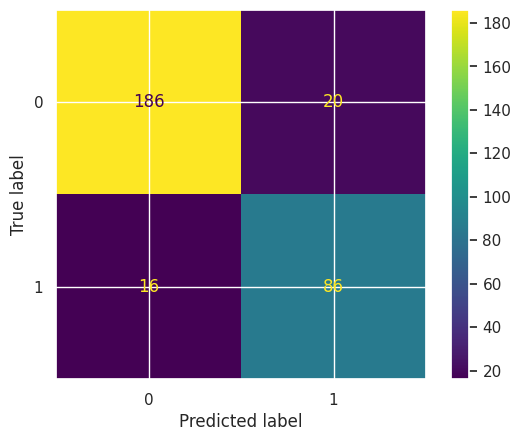

In [ ]:
# Melatih model logistik pada data yang telah di-resampling dan di-scaling
modelXGB_64 = XGB Classifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelXGB_64, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
modelXGB_64.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelXGB_64.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***3.3 Training Testing: SVC***

Training Accuracy Score: 0.792
Testing Accuracy Score: 0.802
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       206
           1       0.66      0.82      0.73       102

    accuracy                           0.80       308
   macro avg       0.78      0.81      0.79       308
weighted avg       0.82      0.80      0.81       308



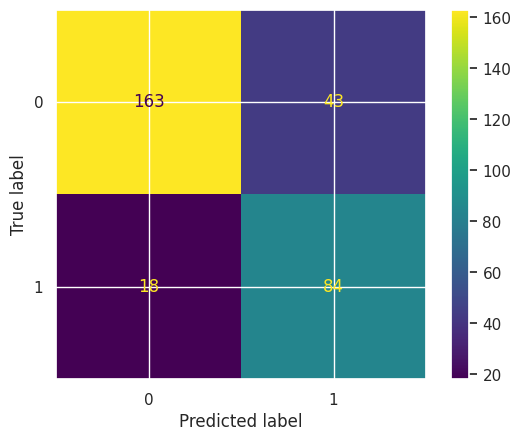

In [ ]:
# Melatih model logistik pada data yang telah di-resampling dan di-scaling
modelSVC_64 = SVC()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelSVC_64, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
modelSVC_64.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelSVC_64.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***3.4 Training Testing: KNeighbors Classifier***

Training Accuracy Score: 0.782
Testing Accuracy Score: 0.750
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80       206
           1       0.59      0.78      0.68       102

    accuracy                           0.75       308
   macro avg       0.73      0.76      0.74       308
weighted avg       0.78      0.75      0.76       308



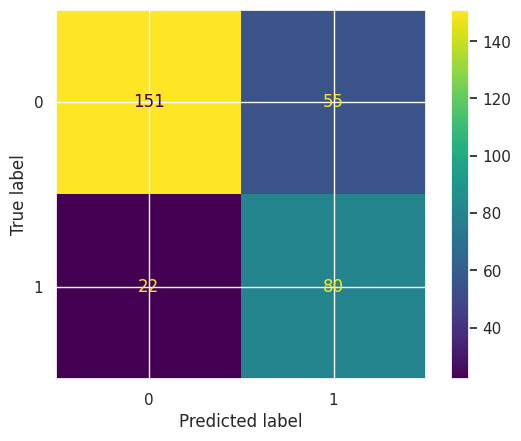

In [ ]:
# Melatih model logistik pada data yang telah di-resampling dan di-scaling
modelKNC_64 = KNeighborsClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelKNC_64, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
modelKNC_64.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelKNC_64.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***3.5 Training Testing: Decision Tree Classifier***

Training Accuracy Score: 0.894
Testing Accuracy Score: 0.838
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       206
           1       0.73      0.81      0.77       102

    accuracy                           0.84       308
   macro avg       0.82      0.83      0.82       308
weighted avg       0.84      0.84      0.84       308



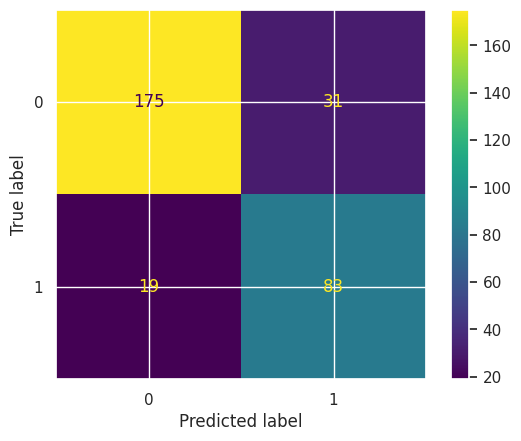

In [ ]:
# Melatih model logistik pada data yang telah di-resampling dan di-scaling
modelDT_64 = DecisionTreeClassifier()

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelDT_64, X_resampled_scaled, y_resampled, cv=kf)

# Melatih model pada keseluruhan data latih
modelDT_64.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = modelDT_64.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***3.6 Training Testing: logistic_regression***

Training Accuracy Score: 0.901
Testing Accuracy Score: 0.903
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       206
           1       0.85      0.86      0.85       102

    accuracy                           0.90       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.90      0.90      0.90       308



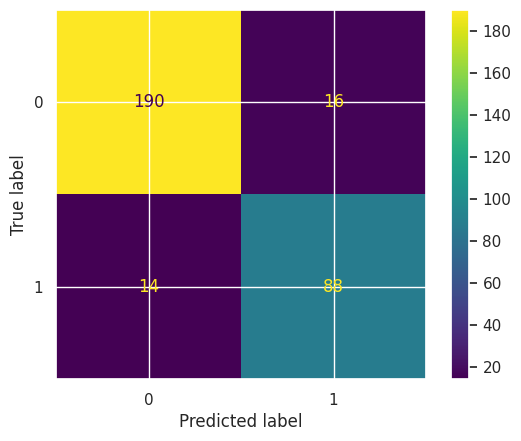

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
estimators =[('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking_64 = StackingClassifier(estimators=estimators,
final_estimator=LogisticRegression())

# Melakukan K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_64, X_resampled_scaled, y_resampled, cv=kf)

stacking_64.fit(X_resampled_scaled, y_resampled)

# Memprediksi label pada set uji
y_test_pred = stacking_64.predict(X_test_scaled)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(cv_scores.mean()))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

####***Menyimpan model ke dalam file***

In [ ]:
import joblib
# Menyimpan model ke dalam file
joblib.dump(modelXGB_64, 'model_xgb.pkl')

['model_xgb.pkl']